**End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

# Setup

In [283]:
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data
usefull links:  
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

In [284]:
# ".read_csv()" reads csv files into so called pandas "dataframes"
housing = pd.read_csv("datasets/housing/housing.csv")

# Try to get header information of the dataframe:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [285]:
# Now try to get informations about the data types in each column, which columns is special?:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [286]:
# Address dataframe columns using their names:
housing["put column name here"]
# And count the values of the "special column" in it
housing["special colum name"]

KeyError: 'put column name here'

In [287]:
# Get description of each column 
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e375e9a20>,
      dtype=object)

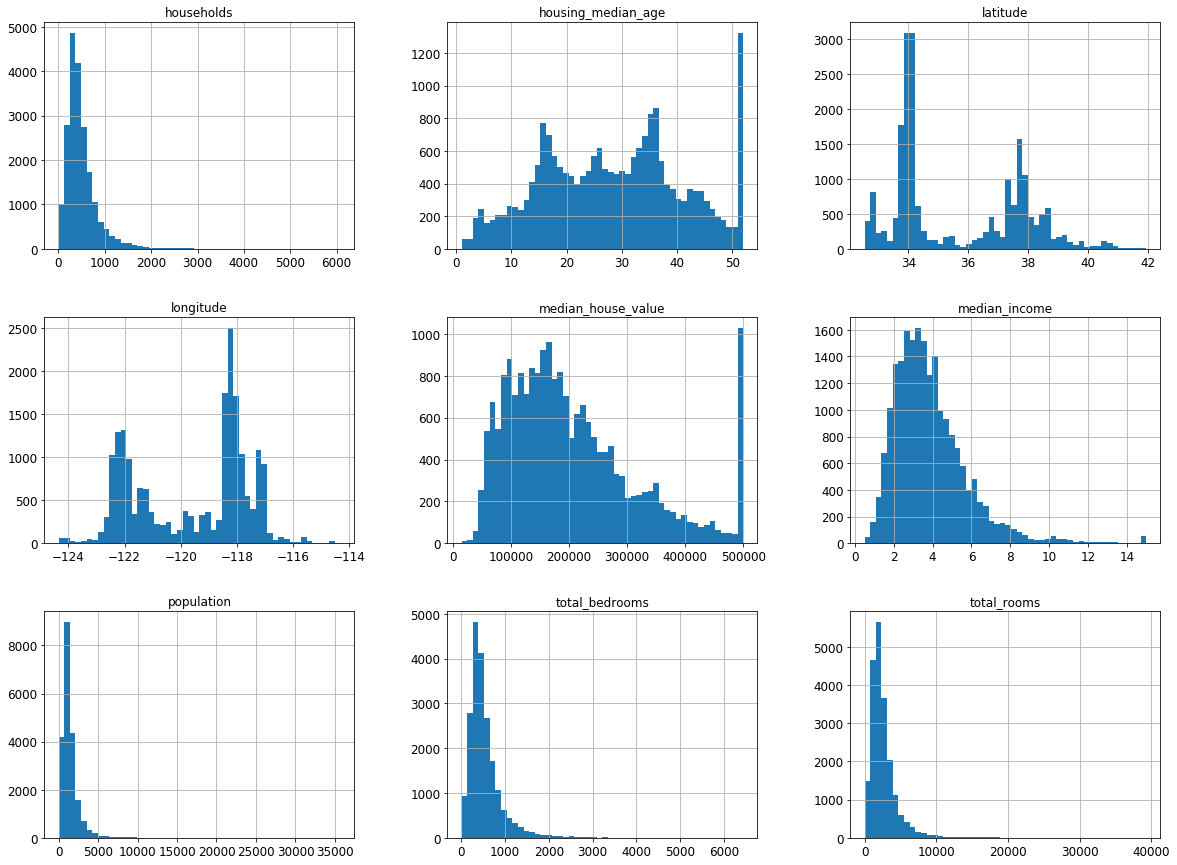

In [288]:
%matplotlib inline
# Now try to plot histograms of the columns
# Hint: there are parameters of the histogram method for formating the plots
housing.hist(bins=50, figsize=(20,15))

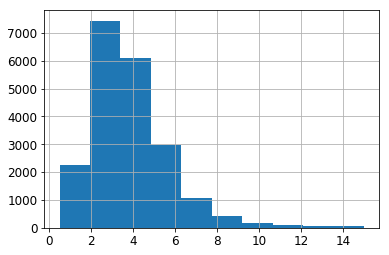

In [289]:
housing["median_income"].hist()

# Discover and visualize the data to gain insights

In [290]:
#housing = strat_train_set.copy()

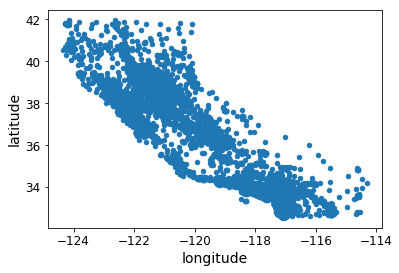

In [291]:
housing.plot(kind="scatter", x="longitude", y="latitude")

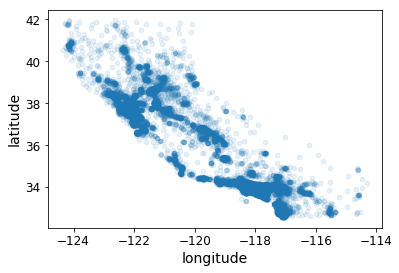

In [292]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

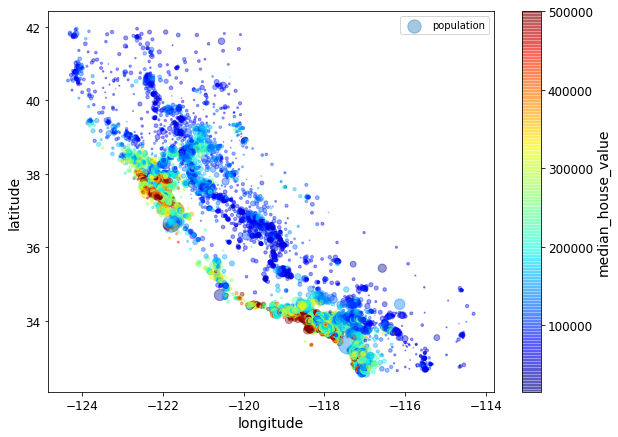

In [293]:
# try to use the plot parameters s (size) and c (color)
# --> more colourful is better!

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [294]:
# Get the correlation matrix 
corr_matrix = housing.corr()

In [295]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e370be4a8>,
      dtype=object)

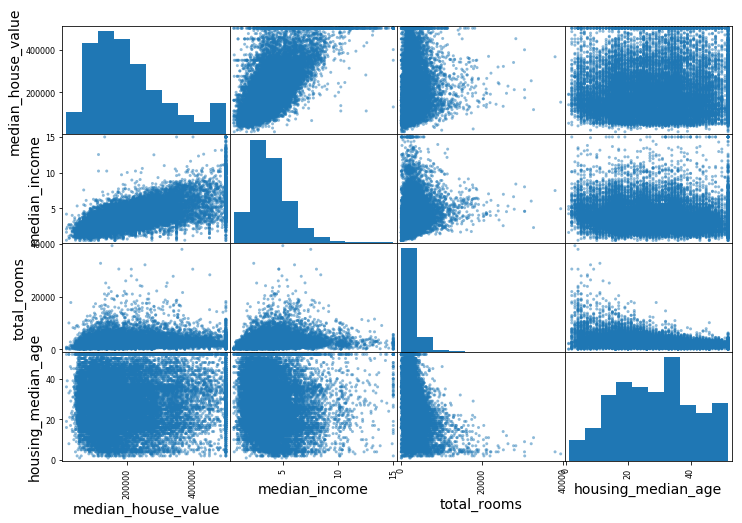

In [296]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

[0, 16, 0, 550000]

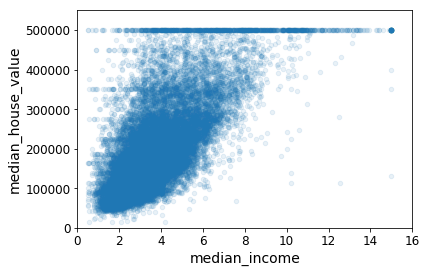

In [297]:
# No try to make a detailed plot of the correlation between median_income and median_house value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [298]:
# The columns total_rooms, total_bedrooms and population are not representative for individual houses
# Try to define new colums which are related to the amount per household or total_rooms

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

In [299]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

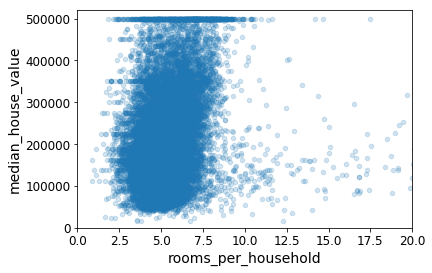

In [300]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 20, 0, 520000])
plt.show()

In [301]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the data for Machine Learning algorithms

### Now separate labels from input data:
1. Create new dataset which just contains labels ("median_house_value") we want to train for
2. Drop "median_house_value" from input data for training

In [302]:
housing_prep = housing.drop("median_house_value", axis=1).copy() # drop labels for training set
housing_prep_labels = housing["median_house_value"].copy()

In [303]:
# Check in which rows there is missing data

sample_incomplete_rows = housing_prep[housing_prep.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,4.633540,NaN,2.403727
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,NEAR BAY,6.000000,NaN,2.935368
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,INLAND,6.265000,NaN,2.841667
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND,5.460474,NaN,3.168972
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,INLAND,5.531481,NaN,2.629630
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,NEAR BAY,7.496994,NaN,2.683367


In [304]:
# How many rows with missing data do we have?
len(sample_incomplete_rows[sample_incomplete_rows.isnull().any(axis=1)])

207

### How to deal with missing data ?
There are several posibilities how to deal with missing data:
1. Drop each row where data is missing / erroneous
2. Drop the colums where data is missing / erroneous
3. Replace the missing data with mean or median of rows where data is available

Choose an option in the cells below!

In [305]:
# Option 1
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


In [306]:
# Option 2
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,NEAR BAY,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,NEAR BAY,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,NEAR BAY,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,NEAR BAY,4.633540,NaN,2.403727
738,-122.14,37.67,37.0,3342.0,1635.0,557.0,4.7933,NEAR BAY,6.000000,NaN,2.935368
1097,-121.77,39.66,20.0,3759.0,1705.0,600.0,4.7120,INLAND,6.265000,NaN,2.841667
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND,5.460474,NaN,3.168972
1456,-121.98,37.96,22.0,2987.0,1420.0,540.0,3.6500,INLAND,5.531481,NaN,2.629630
1493,-122.01,37.94,23.0,3741.0,1339.0,499.0,6.7061,NEAR BAY,7.496994,NaN,2.683367


In [307]:
# Option 3
median_tot_bedrooms = housing_prep["total_bedrooms"].median()
median_bedrooms_p_room = housing_prep["bedrooms_per_room"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median_tot_bedrooms, inplace=True)
sample_incomplete_rows
sample_incomplete_rows["bedrooms_per_room"].fillna(median_bedrooms_p_room, inplace=True)
sample_incomplete_rows
#sample_incomplete_rows[sample_incomplete_rows.isnull().any(axis=1)]

/home/chris/Public/pythin-test/lib/python3.5/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,NEAR BAY,5.761468,0.203162,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,NEAR BAY,3.830116,0.203162,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,NEAR BAY,4.048704,0.203162,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,NEAR BAY,6.102740,0.203162,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,NEAR BAY,4.633540,0.203162,2.403727
738,-122.14,37.67,37.0,3342.0,435.0,1635.0,557.0,4.7933,NEAR BAY,6.000000,0.203162,2.935368
1097,-121.77,39.66,20.0,3759.0,435.0,1705.0,600.0,4.7120,INLAND,6.265000,0.203162,2.841667
1350,-121.95,38.03,5.0,5526.0,435.0,3207.0,1012.0,4.0767,INLAND,5.460474,0.203162,3.168972
1456,-121.98,37.96,22.0,2987.0,435.0,1420.0,540.0,3.6500,INLAND,5.531481,0.203162,2.629630
1493,-122.01,37.94,23.0,3741.0,435.0,1339.0,499.0,6.7061,NEAR BAY,7.496994,0.203162,2.683367


In [308]:
# Apply one of the three options here, to pass the assertion below:

housing_prep["total_bedrooms"].fillna(median_tot_bedrooms, inplace=True)
housing_prep["bedrooms_per_room"].fillna(median_bedrooms_p_room, inplace=True)

assert len(housing_prep[housing_prep.isnull().any(axis=1)]) == 0, "Please make sure there are no more missing values!"

### How to deal with categorical data?

The column `ocean_proximity` is categorical.
At first, check how much `unique` categories there are.

In [309]:
housing_prep['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

[Dummy variables](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) could help here:

In [310]:
cat_dummies = pd.get_dummies(housing_prep['ocean_proximity'])
assert cat_dummies.shape[1] == 5
cat_dummies.head()

AssertionError: 

[Concatenate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) cat_dummies with housing_prep
and then drop the no more needed column `ocean_proximity`

In [277]:
housing_prep2 = pd.concat([housing_prep, cat_dummies], axis = 1).drop(columns=['ocean_proximity'])
assert housing_prep2.shape[1] == 16
housing_prep2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,5.761468,0.203162,2.614679,0,0,1,0
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,3.830116,0.203162,2.826255,0,0,1,0
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,4.048704,0.203162,2.938727,0,0,1,0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,6.102740,0.203162,2.630137,0,0,1,0
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,4.633540,0.203162,2.403727,0,0,1,0


In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled_arr = scaler.fit_transform(housing_prep2)
housing_scaled = pd.DataFrame(housing_scaled_arr, columns = housing_prep2.columns)

# Select and train a model 

In [279]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_scaled, housing_prep_labels)

ValueError: Found input variables with inconsistent numbers of samples: [207, 20640]

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Compare against the actual values:

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# Optional : Fine-tune your model

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

**Note**: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()